# **Mall customers data** 

This project shows how to perform a mall customers segmentation using Machine Learning algorithms. This is the unsupervised clustering problem and three popular algorithms will be presented and compared: KMeans, Hierarchical clustering  and DBSCAN clustering. 

This dataset contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score.

## **Problem Statement:**
You own the mall and want to understand the customers like who can be easily converge (Target customers) so that the sense can be given to marketing team and plan the strategy accordingly.

## **Final Goal:**
The goal of clustering is to maximize the similarity of observation within the cluster and maximize the dissimilarity between the clusters.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans
import matplotlib
%matplotlib inline
import warnings
from sklearn import preprocessing
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
customer_df = pd.read_csv('/content/drive/MyDrive/ML/Data/DS3_C6_S3_MallCustomers_Data_Project.csv')
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#cheking the shape of dataframe
customer_df.shape

(200, 5)

In [ ]:
#checking info
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
#checking null values 
print(customer_df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


### There are no null values present in the data 

In [ ]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


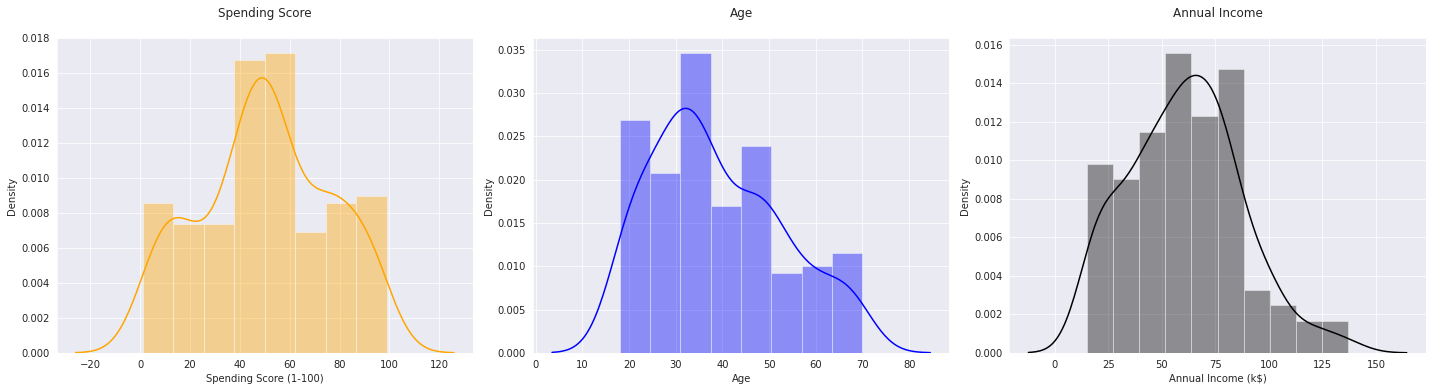

In [ ]:
# -Distribution Plots-

plt.figure(figsize=(20,15))

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n')
sns.distplot(customer_df['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n')
sns.distplot(customer_df['Age'], color='blue')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n')
sns.distplot(customer_df['Annual Income (k$)'], color='black')


plt.tight_layout()

## **Interpretation:**

### 1. Spending score data is normally distributed 

### 2. Most of the customers has age between 20-50

### 3. Annual income data is right skewed.Most of the customers has annual income between 50-80K.

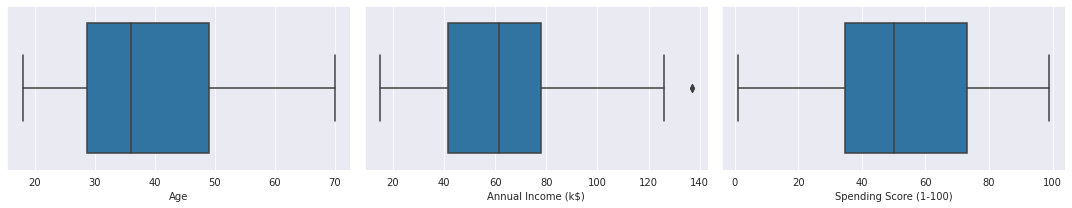

In [ ]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(customer_df[cols[i]], ax=axs[i])
plt.tight_layout()
plt.show()

## **Interpretation:**
### There are no outliers in the data 

Text(0, 0.5, 'Count')

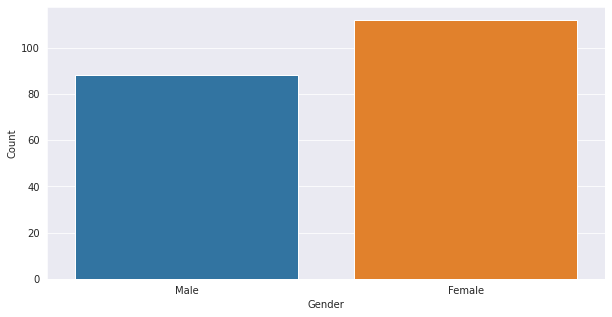

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=customer_df)
plt.xlabel('Gender')
plt.ylabel('Count')

## **Interpretation:**

### There are more number of female customers as compared to male customers 

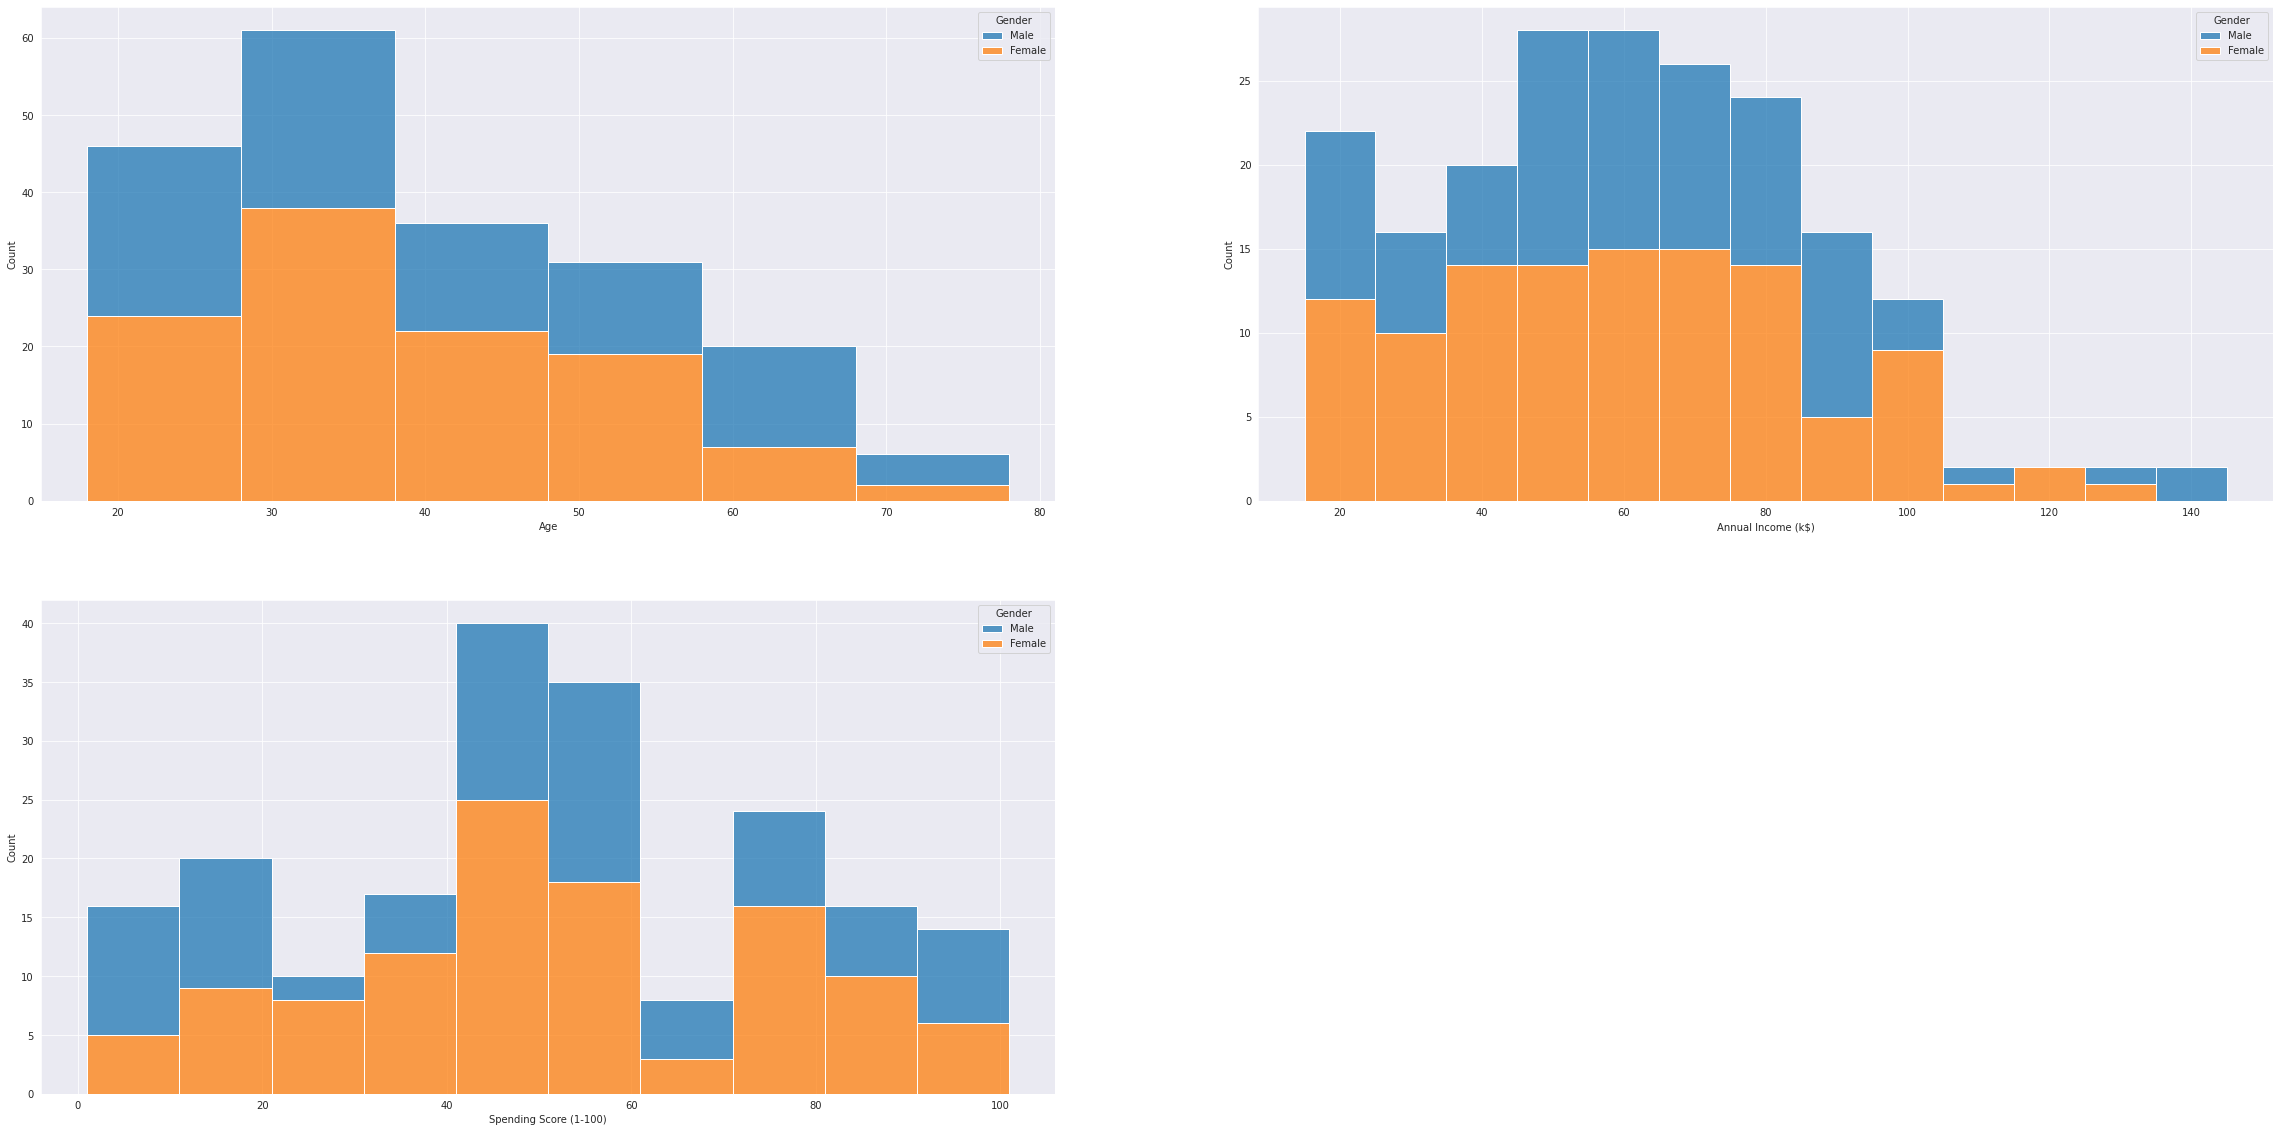

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
sns.histplot(data=customer_df, x='Age', hue='Gender', binwidth=10, multiple='stack')
plt.subplot(2,2,2)
sns.histplot(data=customer_df, x='Annual Income (k$)', hue='Gender', binwidth=10, multiple='stack')
plt.subplot(2,2,3)
sns.histplot(data=customer_df, x='Spending Score (1-100)', hue='Gender', binwidth=10, multiple='stack')

## Interpretation:

### 1.20-30, 30-40 are the most common ages groups among customers.
###2.The biggest cusomer age group is 30 year-old customers (mostly females).
###3.Most of customers earn between 50k-80k.
###4.Most of the customers spending score is between 40k-60k (mostly females).

## k-means Clustering 

### There is no huge difference in the scales of Age, Annual Income and Spending Score features, so ne need to scale this dataset.


In [ ]:
#Annual Income (k$) and Spending Score (1-100)
df = customer_df.iloc[:,3:]
df = df.values

In [ ]:
#Age and Spending Score (1-100)
df1 = customer_df[['Age','Spending Score (1-100)']]
df1=df1.values

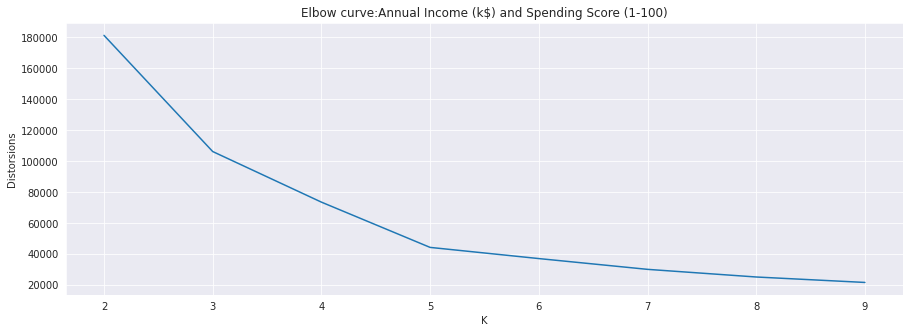

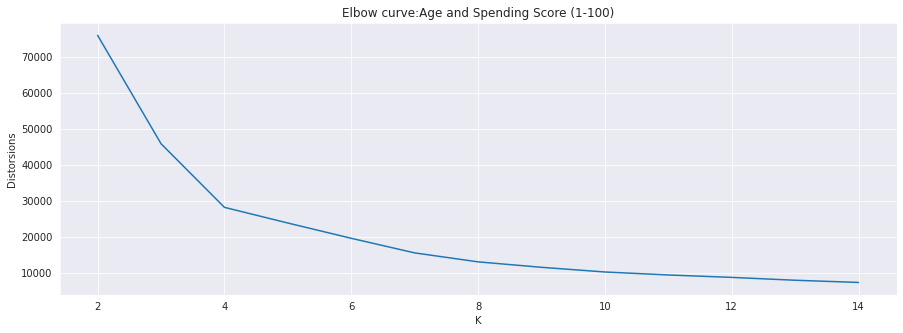

In [ ]:
distorsions = []
distorsions1 = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distorsions.append(kmeans.inertia_)

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    distorsions1.append(kmeans.inertia_) 

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve:Annual Income (k$) and Spending Score (1-100)');

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions1)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve:Age and Spending Score (1-100)');

## **Interpretation:**
### The optimum value of k is at k=5 for Annual Income (k$) and Spending Score (1-100)

### The optimum value of k is at k=6 for Age and Spending Score (1-100)

### Checking the value of k and cluster efficiency using Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395


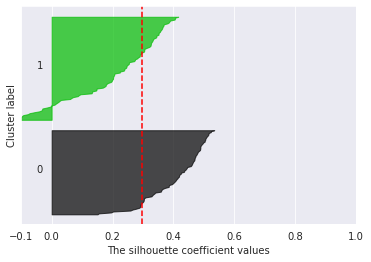

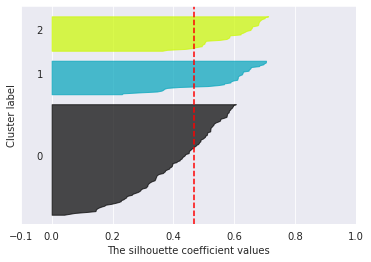

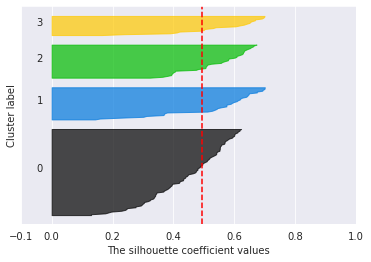

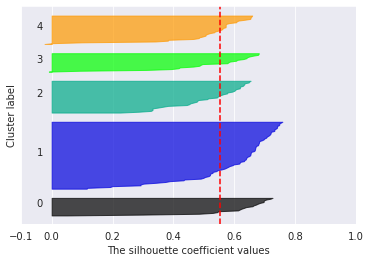

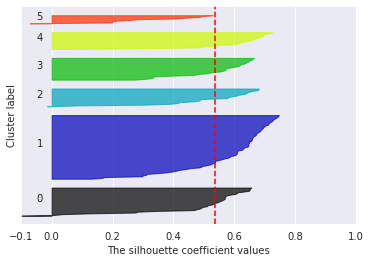

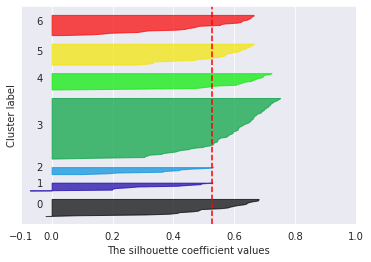

In [ ]:
#Annual Income (k$) and Spending Score 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

### Silhouette Score is 0.55 which is high for k=5 

For n_clusters = 2 The average silhouette_score is : 0.4692341232501655
For n_clusters = 3 The average silhouette_score is : 0.45300127016521263
For n_clusters = 4 The average silhouette_score is : 0.49973941540141753
For n_clusters = 5 The average silhouette_score is : 0.46553524067755037
For n_clusters = 6 The average silhouette_score is : 0.4376185638584134
For n_clusters = 7 The average silhouette_score is : 0.42313509747504796
For n_clusters = 8 The average silhouette_score is : 0.4304921688137185
For n_clusters = 9 The average silhouette_score is : 0.41671999499926166
For n_clusters = 10 The average silhouette_score is : 0.40542078190094527


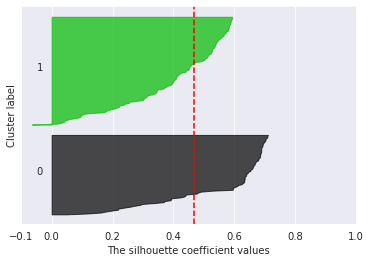

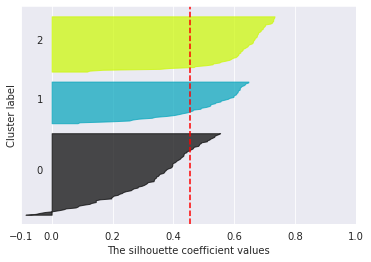

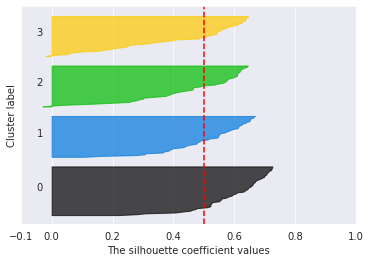

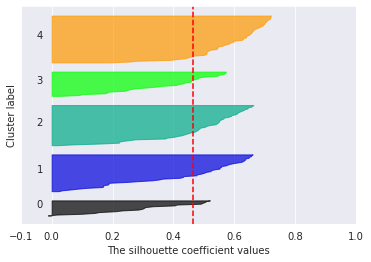

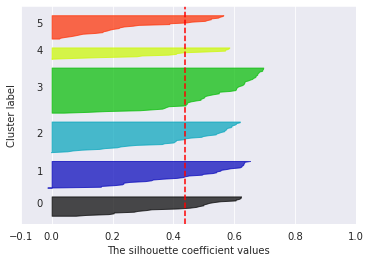

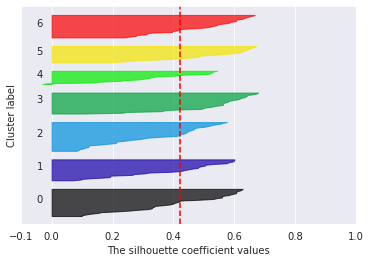

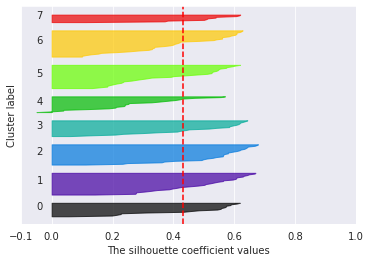

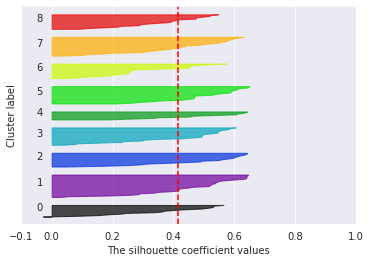

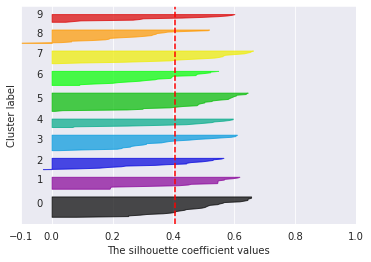

In [ ]:
#Age and Spending Score 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df1)

    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df1, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [ ]:
#Building the model using K=5
Kmeans_model1 = KMeans(n_clusters=5)
Kmeans_model1.fit(df)
cluster_centroid1 = Kmeans_model1.cluster_centers_
labels1 = Kmeans_model1.labels_

In [ ]:
#Building the model using K=5
Kmeans_model2 = KMeans(n_clusters=5)
Kmeans_model2.fit(df1)
cluster_centroid2 = Kmeans_model2.cluster_centers_
labels2 = Kmeans_model2.labels_

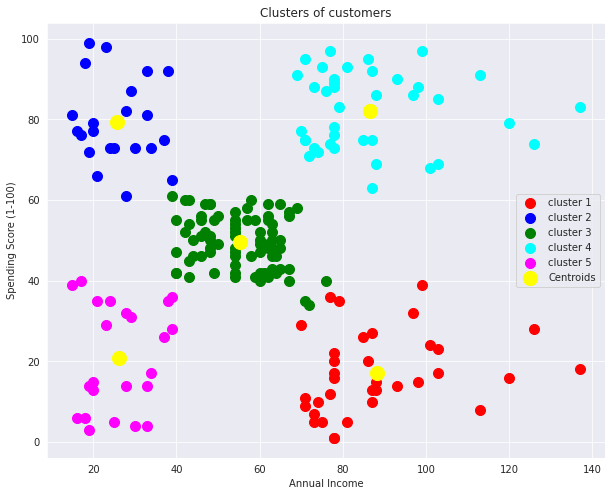

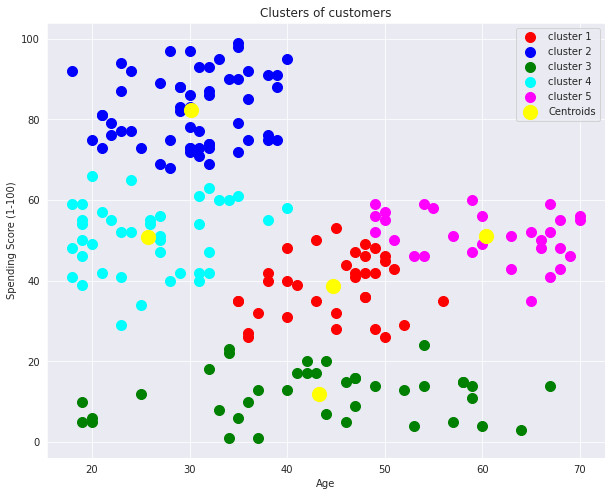

In [ ]:
# Visualising the clusters
plt.figure(figsize=(10,8))
plt.scatter(df[labels1==0,0],df[labels1==0,1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(df[labels1==1,0],df[labels1==1,1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(df[labels1==2,0],df[labels1==2,1], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(df[labels1==3,0],df[labels1==3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(df[labels1==4,0],df[labels1==4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_centroid1[:,0],cluster_centroid1[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(df1[labels2==0,0],df1[labels2==0,1], s = 100, c = 'red', label ='cluster 1' )
plt.scatter(df1[labels2==1,0],df1[labels2==1,1], s = 100, c = 'blue', label ='cluster 2' )
plt.scatter(df1[labels2==2,0],df1[labels2==2,1], s = 100, c = 'green', label ='cluster 3' )
plt.scatter(df1[labels2==3,0],df1[labels2==3,1], s = 100, c = 'cyan', label = 'cluster 4')
plt.scatter(df1[labels2==4,0],df1[labels2==4,1], s = 100, c = 'magenta', label = 'cluster 5')
plt.scatter(cluster_centroid2[:,0],cluster_centroid2[:,1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Interpretation:**

### K-Means algorithm generated the following 5 clusters:
###Annual Income (k$) and Spending Score 
1.   Red:Customers with medium annual income and medium spending score
2.   blue:Customers with high annual income and low spending score
3.   Green:Customers with high annual income and high spending score
4.   cyan:Customers with low annual income and low spending score
5.   Magenta:Customers with low annual income and high spending score

### K-Means algorithm generated the following 5 clusters:
###Age and Spending Score 
1.   Red:Customers with age 20-40 and high spending score
2.   blue:Customers with age 45-70 and medium spending score
3.   Green:Customers with age 20-40 and medium spending score
4.   cyan:Customers with age 45-70 and low spending score
5.   Magenta:Customers with age 20-40 and low spending score

### Cluster formation in quite good with the Annual income and spending score.

##Hierarchical Clustering 

In [ ]:
import scipy.cluster.hierarchy as sch

### We need to choose the number of clusters and for doing this, we’ll use Dendrograms.

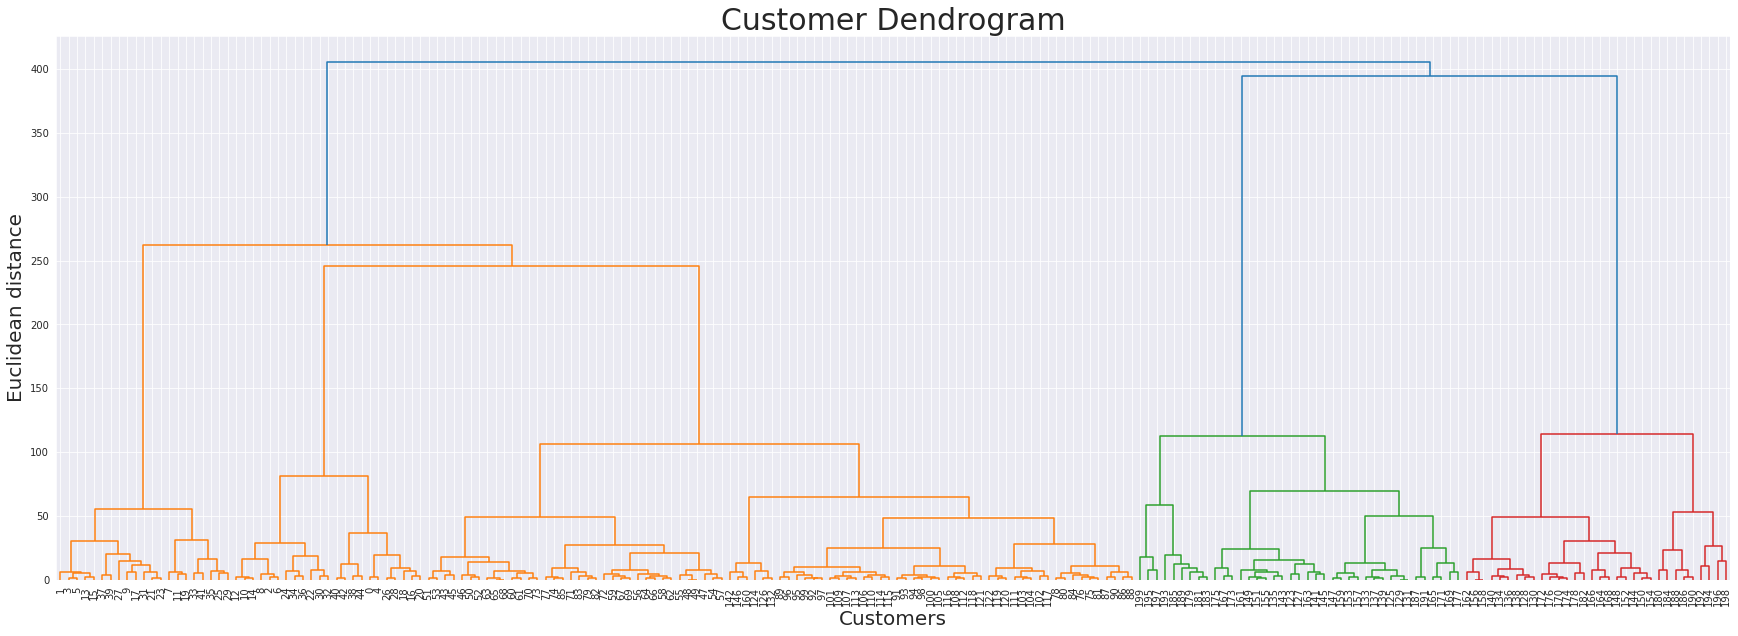

In [ ]:
#Annual Income (k$) and Spending Score (1-100)
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'),labels=customer_df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

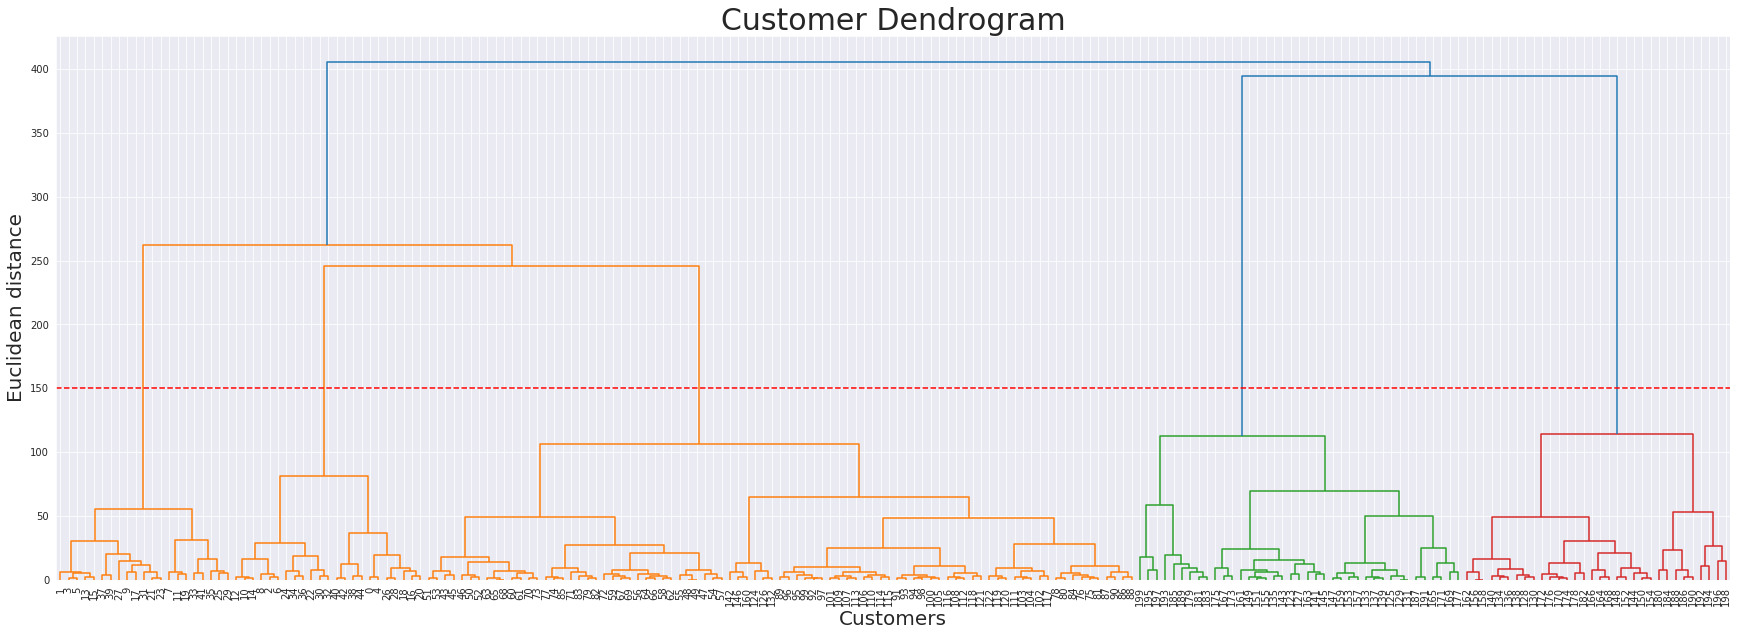

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'),labels=customer_df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 150 and cut the dendrogram:

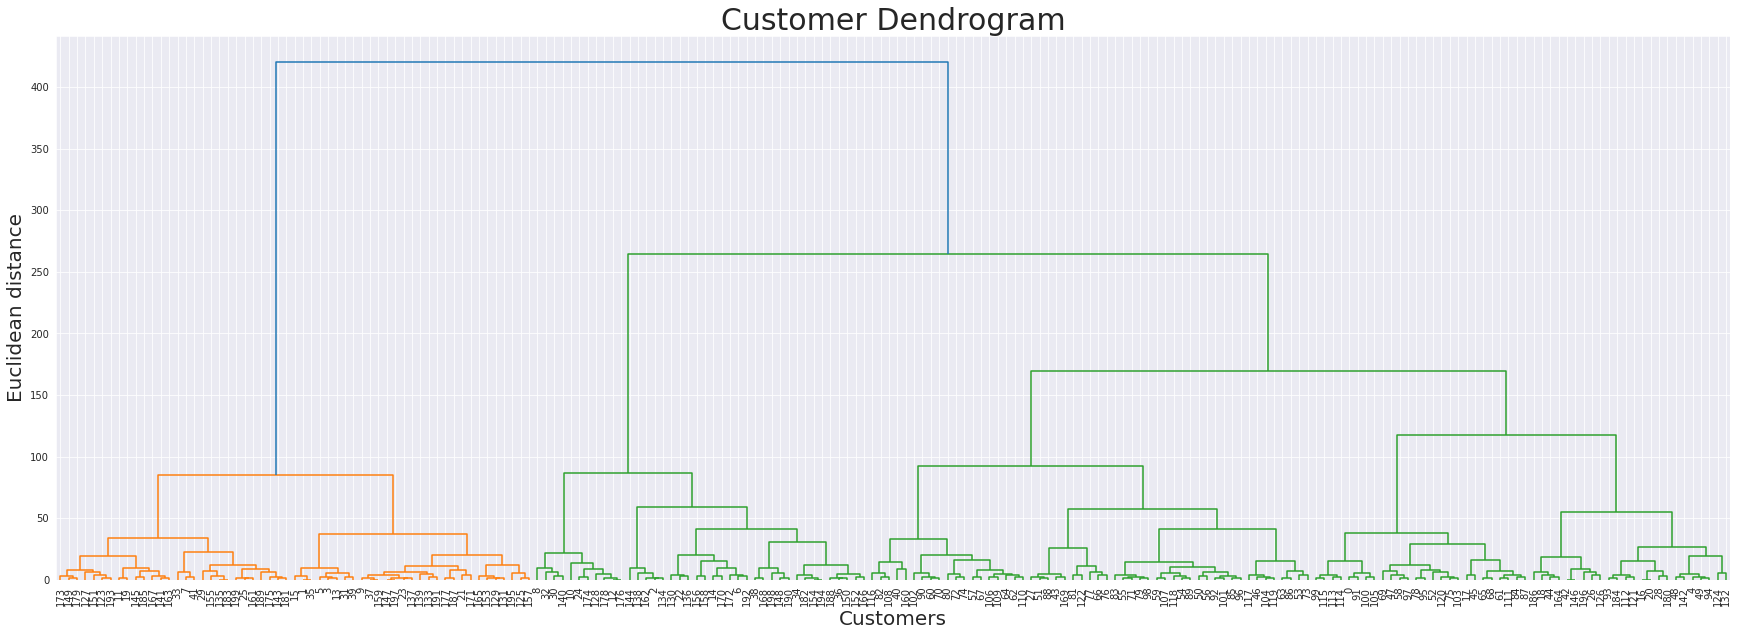

In [ ]:
#Age and Spending Score (1-100)
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df1, method = 'ward'),labels=customer_df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

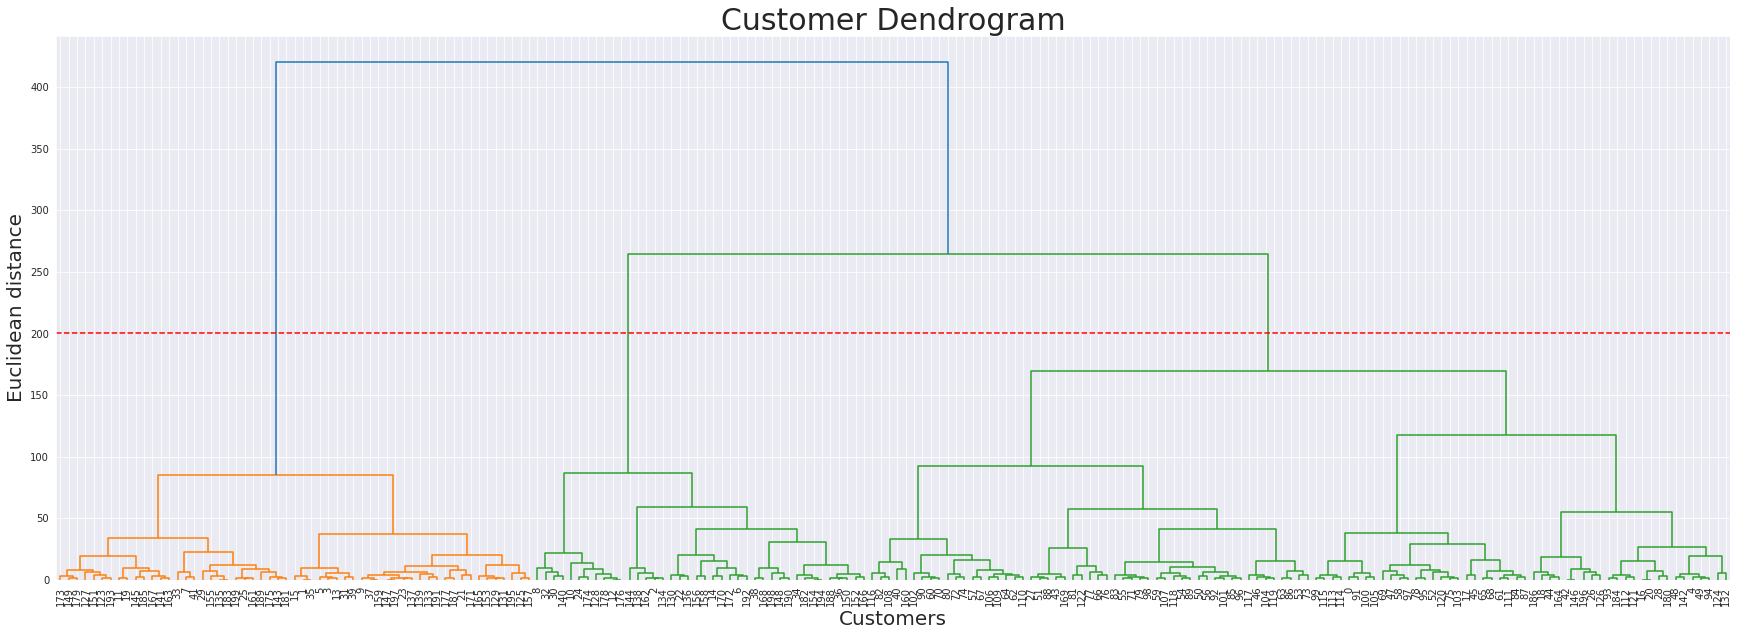

In [ ]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df1, method = 'ward'),labels=customer_df.index)
plt.axhline(y=200, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

## **Interpretation:**
### In our case, it's 5 for Annual Income (k$) and Spending Score (1-100) and 3 for Age and Spending Score (1-100). So let's fit the Agglomerative model with 5 and 3 clusters.



In [ ]:
#Annual Income (k$) and Spending Score (1-100)
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df)

In [ ]:
#Age and Spending Score (1-100)
from sklearn.cluster import AgglomerativeClustering
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(df1)

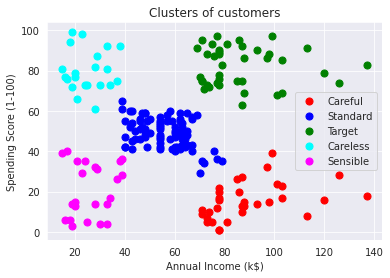

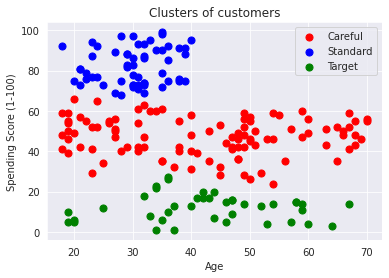

In [ ]:
plt.scatter(df[y_hc == 0, 0], df[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(df[y_hc == 1, 0], df[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(df[y_hc == 2, 0], df[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(df[y_hc == 3, 0], df[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(df[y_hc == 4, 0], df[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

plt.scatter(df1[y_hc1 == 0, 0], df1[y_hc1 == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(df1[y_hc1 == 1, 0], df1[y_hc1 == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(df1[y_hc1 == 2, 0], df1[y_hc1 == 2, 1], s = 50, c = 'green', label = 'Target')
#plt.scatter(df1[y_hc == 3, 0], df1[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
#plt.scatter(df1[y_hc == 4, 0], df1[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Interpretation:**

### Hierarchical Clustering generated the following 5 clusters:
###Annual Income (k$) and Spending Score 
1.   Red:Customers with high annual income and low spending score
2.   blue:Customers with medium annual income and medium spending score
3.   Green:Customers with high annual income and high spending score
4.   cyan:Customers with low annual income and high spending score
5.   Magenta:Customers with low annual income and low spending score

###Age and Spending Score generated 3 clusters:
1. Customers witha age 20-40 has high spending score

## DBSCAN Clustering 

### Find the optimum values of hyperparameters of DBSCAN algorithm

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

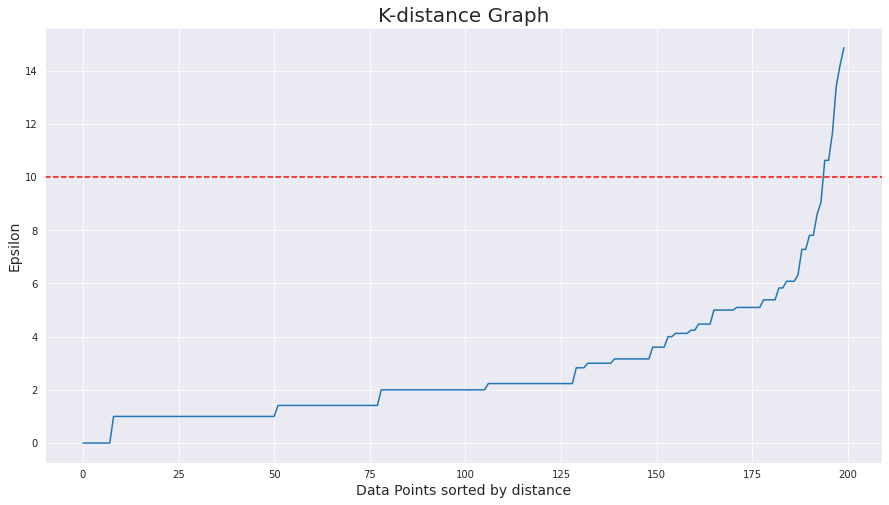

In [ ]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=10, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
eps=10
for min_samples in [1,2,3,4,5,6,7,8,9,8,10,11,12,13,14,15,16,17,18,19,20]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 10 | min_samples=  1 | obtained clustering:  [(2, 126), (3, 3), (4, 33), (5, 28), (6, 2), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1)]
eps= 10 | min_samples=  2 | obtained clustering:  [(1, 6), (2, 126), (3, 3), (4, 33), (5, 28), (6, 2), (7, 2)]
eps= 10 | min_samples=  3 | obtained clustering:  [(1, 10), (2, 126), (3, 3), (4, 33), (5, 28)]
eps= 10 | min_samples=  4 | obtained clustering:  [(1, 15), (2, 125), (3, 33), (4, 27)]
eps= 10 | min_samples=  5 | obtained clustering:  [(1, 17), (2, 113), (3, 11), (4, 32), (5, 27)]
eps= 10 | min_samples=  6 | obtained clustering:  [(1, 20), (2, 111), (3, 12), (4, 31), (5, 26)]
eps= 10 | min_samples=  7 | obtained clustering:  [(1, 23), (2, 12), (3, 16), (4, 95), (5, 31), (6, 23)]
eps= 10 | min_samples=  8 | obtained clustering:  [(1, 38), (2, 14), (3, 8), (4, 90), (5, 28), (6, 22)]
eps= 10 | min_samples=  9 | obtained clustering:  [(1, 53), (2, 12), (3, 87), (4, 26), (5, 22)]
eps= 10 | min_samples=  8 | obtained clustering:  [

### Applying DBSCAN algorithm with Hyperparameters to cluster the data

In [ ]:
import matplotlib
from sklearn import metrics

In [ ]:
X1 = customer_df.iloc[:,3:]

In [ ]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=10,min_samples=7)
dbscan_opt.fit(X1)

DBSCAN(eps=10, min_samples=7)

In [ ]:
X1['DBSCAN_opt_labels']=dbscan_opt.labels_
X1['DBSCAN_opt_labels'].value_counts()

 2    95
 3    31
-1    23
 4    23
 1    16
 0    12
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.422


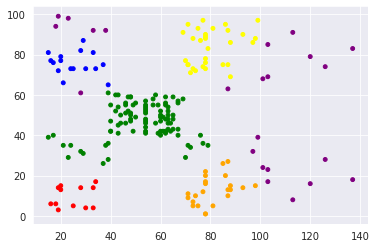

In [ ]:
colors=['purple','red','blue','green','yellow','orange']
plt.scatter(X1['Annual Income (k$)'], X1['Spending Score (1-100)'], c=X1['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X1, X1['DBSCAN_opt_labels']))

In [ ]:
for i in range(0,20):
  dbscan_opts = DBSCAN(eps=10,min_samples=i)
  dbscan_opts.fit(X1)
  print(f"sample={i},silhouette coefficient: {metrics.silhouette_score(X1,dbscan_opts.labels_)}")

sample=0,silhouette coefficient: 0.28966613418473475
sample=1,silhouette coefficient: 0.28966613418473475
sample=2,silhouette coefficient: 0.3231947771677535
sample=3,silhouette coefficient: 0.3629155621151527
sample=4,silhouette coefficient: 0.39903689303621237
sample=5,silhouette coefficient: 0.3950740784068415
sample=6,silhouette coefficient: 0.42192764806050087
sample=7,silhouette coefficient: 0.42192764806050087
sample=8,silhouette coefficient: 0.3640925623946876
sample=9,silhouette coefficient: 0.3150157498265522
sample=10,silhouette coefficient: 0.30444443783571934
sample=11,silhouette coefficient: 0.2553236563528794
sample=12,silhouette coefficient: 0.22435899162375728
sample=13,silhouette coefficient: 0.2256570060475789
sample=14,silhouette coefficient: 0.12795865606576487
sample=15,silhouette coefficient: 0.12795865606576487
sample=16,silhouette coefficient: 0.1574017605954425
sample=17,silhouette coefficient: 0.15243907905262627
sample=18,silhouette coefficient: 0.1524390790

## **Interpretation:**
From the above comparisons, it is clear that DBSCAN failed to generate reasonable clusters. It is most likely because DBCSAN tries to find clusters based on the density of points.

K-Means and , Hierarchical clustering algorithms created 5 clusters which are formed well.

Hierarchical clustering algorithms created best clusers.